<a href="https://colab.research.google.com/github/kalz2q/mycolabnotebooks/blob/master/matplotlibtutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境 スタイル
matplotlib.style.use() で スタイルが選べる。


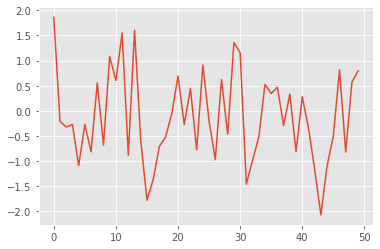

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
data = np.random.randn(50)
plt.plot(data)
plt.show()

In [26]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


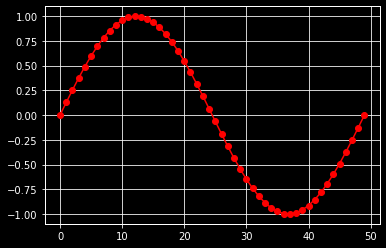

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('dark_background')
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

plt.plot の中で 'r-o' とか指定できる。

plt.rcParamsで細かく指定できる。

rcParamsで指定したもののセットが style なのだろう。

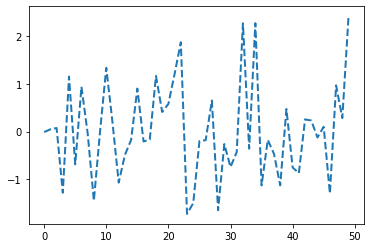

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(50)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
plt.plot(data)
plt.show()

グラフの色は勝手に選ばれるのを変えるには axes.prop_cycle を変えるとあるが、これはエラーになった。



In [ ]:
# import matplotlib as mpl
# mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y']
# plt.plot(data)  # first color is red
# plt.show()

グラフのスタイルを設定するのに `style.use`, `rcParams` 以外に `rc` でキーワード引数をつかってまとめて設定する方法がある。


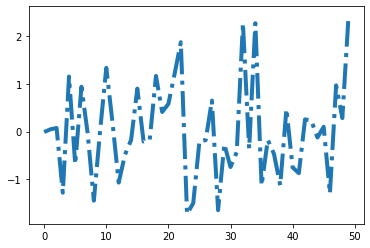

In [14]:
import matplotlib.pyplot as plt
plt.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

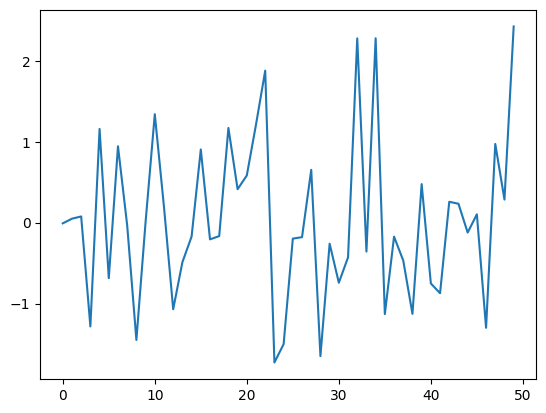

In [17]:
plt.rcdefaults()
plt.plot(data)
plt.show()

`matplotlib.rcdefaults` will restore the standard Matplotlib
default settings.

There is some degree of validation when setting the values of rcParams, see
:mod:`matplotlib.rcsetup` for details.


The :file:`matplotlibrc` file
-----------------------------

Matplotlib uses :file:`matplotlibrc` configuration files to customize all
kinds of properties, which we call 'rc settings' or 'rc parameters'. You can
control the defaults of almost every property in Matplotlib: figure size and
DPI, line width, color and style, axes, axis and grid properties, text and
font properties and so on. When a URL or path is not specified with a call to
``style.use('<path>/<style-name>.mplstyle')``, Matplotlib looks for
:file:`matplotlibrc` in four locations, in the following order:

1. :file:`matplotlibrc` in the current working directory, usually used for
   specific customizations that you do not want to apply elsewhere.

2. :file:`$MATPLOTLIBRC` if it is a file, else
   :file:`$MATPLOTLIBRC/matplotlibrc`.

3. It next looks in a user-specific place, depending on your platform:

   - On Linux and FreeBSD, it looks in
     :file:`.config/matplotlib/matplotlibrc` (or
     :file:`$XDG_CONFIG_HOME/matplotlib/matplotlibrc`) if you've customized
     your environment.

   - On other platforms, it looks in :file:`.matplotlib/matplotlibrc`.

   See `locating-matplotlib-config-dir`.

4. :file:`{INSTALL}/matplotlib/mpl-data/matplotlibrc`, where
   :file:`{INSTALL}` is something like
   :file:`/usr/lib/python3.7/site-packages` on Linux, and maybe
   :file:`C:\\Python37\\Lib\\site-packages` on Windows. Every time you
   install matplotlib, this file will be overwritten, so if you want
   your customizations to be saved, please move this file to your
   user-specific matplotlib directory.

Once a :file:`matplotlibrc` file has been found, it will *not* search any of
the other paths.

To display where the currently active :file:`matplotlibrc` file was
loaded from, one can do the following::

  >>> import matplotlib
  >>> matplotlib.matplotlib_fname()
  '/home/foo/.config/matplotlib/matplotlibrc'

See below for a sample `matplotlibrc file<matplotlibrc-sample>`.


A sample matplotlibrc file
~~~~~~~~~~~~~~~~~~~~~~~~~~

.. literalinclude:: ../../../matplotlibrc.template



